In [1]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.misc import imresize
from mammo_utils import remove_white_from_image, slice_normal_image, create_slices, read_pgm
%matplotlib inline

In [115]:
all_cases_df = pd.read_pickle(os.path.join("data", "all_cases_df.pkl"))

# drop any rows that have NA for radius
all_cases_df.dropna(subset=['RADIUS'], axis=0, inplace=True)

ddsm_images = np.load(os.path.join("data", "mass_test_slices.npy"))

In [40]:
# import an image to look at it
base_path = "D:\\Documents\\Mammography\\MIAS\\pgms\\"

def draw_image_with_roi(idx):
    img_location = all_cases_df.iloc[idx]['path']
    
    x_center = all_cases_df.iloc[idx]['X']
    y_center = all_cases_df.iloc[idx]['Y']
    radius = all_cases_df.iloc[idx]['RADIUS']
    
    path = base_path + img_location
    
    img = read_pgm(path)

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.plot([x_center],[1024-y_center], 'ro')
    circle1 = plt.Circle((x_center, 1024-y_center), radius, color='r', fill=False)
    ax.add_artist(circle1)
    ax.set_title("Radius:" + str(radius))

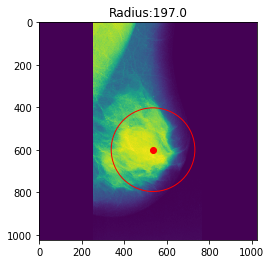

In [117]:
draw_image_with_roi(0)

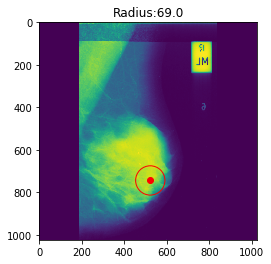

In [118]:
draw_image_with_roi(1)

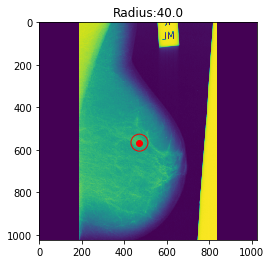

In [119]:
draw_image_with_roi(4)

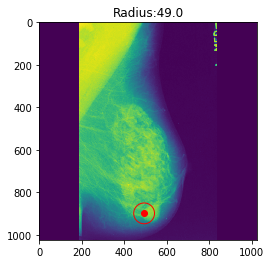

In [120]:
draw_image_with_roi(9)

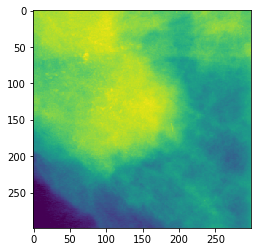

In [121]:
# this is one of the ddsm slices
plt.imshow(ddsm_images[0].reshape((299,299)))

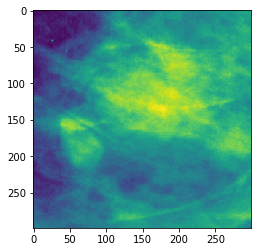

In [123]:
plt.imshow(ddsm_images[100].reshape((299,299)))

In [50]:
## try to resize an MIAS image
img_path = "D:\\Documents\\Mammography\\MIAS\\pgms\\mdb001.pgm"
small_image = read_pgm(img_path)
big_image = imresize(small_image, (4048,4048))

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [80]:
def draw_big_image_with_roi(idx):
    img_location = all_cases_df.iloc[idx]['path']
    
    x_center = all_cases_df.iloc[idx]['X'] * 4
    y_center = all_cases_df.iloc[idx]['Y'] * 4
    radius = all_cases_df.iloc[idx]['RADIUS'] * 4
    
    path = base_path + img_location
    
    img = read_pgm(path)
    img = imresize(img, (4048,4048))
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.plot([x_center],[4048-y_center], 'ro')
    circle1 = plt.Circle((x_center, 4048-y_center), radius, color='r', fill=False)
    circle2 = plt.Circle((x_center, 4048-y_center), 150, color='b', fill=False)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.set_title("Radius:" + str(radius))
    
    return img

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


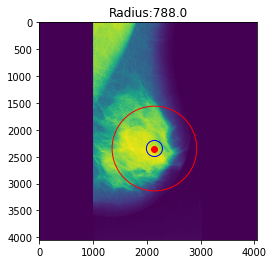

In [124]:
img0 = draw_big_image_with_roi(0)

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


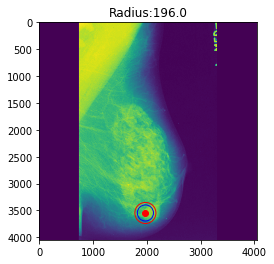

In [125]:
img9 = draw_big_image_with_roi(9)

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


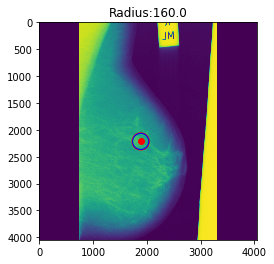

In [126]:
img4 = draw_big_image_with_roi(4)

In [107]:
# remove a slice of size 299x299 from the bigger image
def get_image_slice(idx, scale_by=4):
    img_name = all_cases_df.iloc[idx]['path']
    
    path = base_path + img_name
    
    img = read_pgm(path)
    new_size = 1024 * scale_by
    img = imresize(img, (new_size,new_size))
    
    center_col = int(all_cases_df.iloc[idx]['X'] * scale_by)
    center_row = int(new_size - (all_cases_df.iloc[idx]['Y'] * scale_by))

    start_col = center_col - 150
    end_col = center_col + 149

    start_row = center_row - 150
    end_row = center_row + 149

    img_slice = img[start_row:end_row, start_col:end_col]

    plt.imshow(img_slice)

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


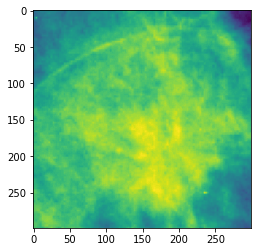

In [131]:
get_image_slice(25, scale_by=3)

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


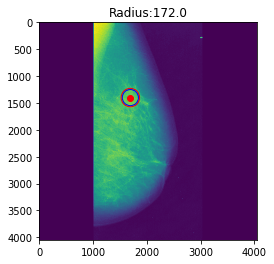

In [132]:
img = draw_big_image_with_roi(25)

In [116]:
all_cases_df.head(30)

,REFNUM,CLASS,SEVERITY,X,Y,RADIUS,path,ABNORMAL,TYPE,CLASS_Y,BG_D,BG_F,BG_G
0,mdb001,CIRC,B,535.0,425.0,197.0,mdb001.pgm,1.0,0,3,0,0,1
1,mdb002,CIRC,B,522.0,280.0,69.0,mdb002.pgm,1.0,0,3,0,0,1
4,mdb005,CIRC,B,477.0,133.0,30.0,mdb005.pgm,1.0,0,3,0,1,0
9,mdb010,CIRC,B,525.0,425.0,33.0,mdb010.pgm,1.0,0,3,0,1,0
11,mdb012,CIRC,B,471.0,458.0,40.0,mdb012.pgm,1.0,0,3,0,1,0
12,mdb013,MISC,B,667.0,365.0,31.0,mdb013.pgm,1.0,0,4,0,0,1
14,mdb015,CIRC,B,595.0,864.0,68.0,mdb015.pgm,1.0,0,3,0,0,1
16,mdb017,CIRC,B,547.0,573.0,48.0,mdb017.pgm,1.0,0,3,0,0,1
18,mdb019,CIRC,B,653.0,477.0,49.0,mdb019.pgm,1.0,0,3,0,0,1
20,mdb021,CIRC,B,493.0,125.0,49.0,mdb021.pgm,1.0,0,3,0,0,1
